In [1]:
import sklearn
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# define an imbalanced dataset 3 classes
# 2 informative features
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2,
    n_clusters_per_class=1, weights=[0.4, 0.1, 0.3, 0.92], flip_y=0, n_classes=4,
    n_redundant=0, n_repeated=0,class_sep=0.8,random_state=0)

In [3]:
# convert to pandas Dataframe
imb_df = pd.DataFrame(X, columns = ['X1','X2'])
imb_df['y'] = y

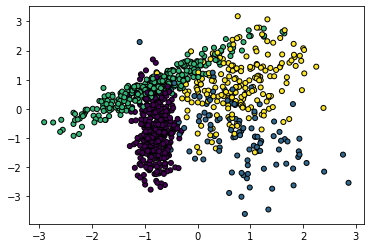

In [4]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

In [5]:
def plot_decision_function(X, y, clf, ax):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor='k')

Create Train Test Split

In [6]:
msk = np.random.rand(len(imb_df)) < 0.8

train = imb_df[msk]
test = imb_df[~msk]

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

y_train = train.pop('y')
clf = LogisticRegression(random_state=0).fit(train, y_train)

scores = cross_val_score(clf, train, y_train, cv=10)
scores = pd.Series(scores)
print('Cross Validation Score Imb:\nmean: {}\nmin: {}\nmax: {}'.format(scores.mean(),scores.min(),scores.max()))

Cross Validation Score Imb:
mean: 0.835601851851852
min: 0.7530864197530864
max: 0.9012345679012346


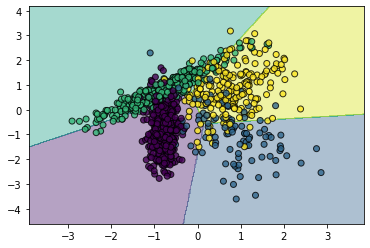

In [8]:
ax = plt.axes()
plot_decision_function(X,y, clf,ax)